In [1]:
import pandas as pd
import numpy as np


# Section 1

In [5]:
df=pd.read_csv(r"output/section_1/summary_results_hp_12-13 11_03_39.csv")

In [6]:
df.sort_values(by='last_100_episodes_reward',ascending=False).head()

,Unnamed: 0,alpha,gamma,epsilon,epsilon_decay,epsilon_min,n_episodes,max_steps,total_reward,mean_reward,final_epsilon,last_100_episodes_reward
6,6,0.3,0.97,0.01,0.995,0.01,5000.0,100.0,2689.0,0.5378,1.304379e-13,0.74
3,3,0.3,0.99,0.01,0.995,0.01,5000.0,100.0,2932.0,0.5864,1.304379e-13,0.73
18,18,0.2,0.99,0.01,0.995,0.01,5000.0,100.0,2961.0,0.5922,1.304379e-13,0.70
39,39,0.1,0.95,0.01,0.995,0.01,5000.0,100.0,2008.0,0.4016,1.304379e-13,0.67
34,34,0.1,0.99,0.01,0.990,0.01,5000.0,100.0,2318.0,0.4636,1.499592e-24,0.64


In [8]:
df.sort_values(by='mean_reward',ascending=False).head()

,Unnamed: 0,alpha,gamma,epsilon,epsilon_decay,epsilon_min,n_episodes,max_steps,total_reward,mean_reward,final_epsilon,last_100_episodes_reward
19,19,0.2,0.99,0.01,0.990,0.01,5000.0,100.0,3159.0,0.6318,1.499592e-24,0.52
18,18,0.2,0.99,0.01,0.995,0.01,5000.0,100.0,2961.0,0.5922,1.304379e-13,0.70
3,3,0.3,0.99,0.01,0.995,0.01,5000.0,100.0,2932.0,0.5864,1.304379e-13,0.73
21,21,0.2,0.97,0.01,0.995,0.01,5000.0,100.0,2818.0,0.5636,1.304379e-13,0.64
6,6,0.3,0.97,0.01,0.995,0.01,5000.0,100.0,2689.0,0.5378,1.304379e-13,0.74


In [10]:
df.columns

Index(['Unnamed: 0', 'alpha', 'gamma', 'epsilon', 'epsilon_decay',
       'epsilon_min', 'n_episodes', 'max_steps', 'total_reward', 'mean_reward',
       'final_epsilon', 'last_100_episodes_reward'],
      dtype='object')

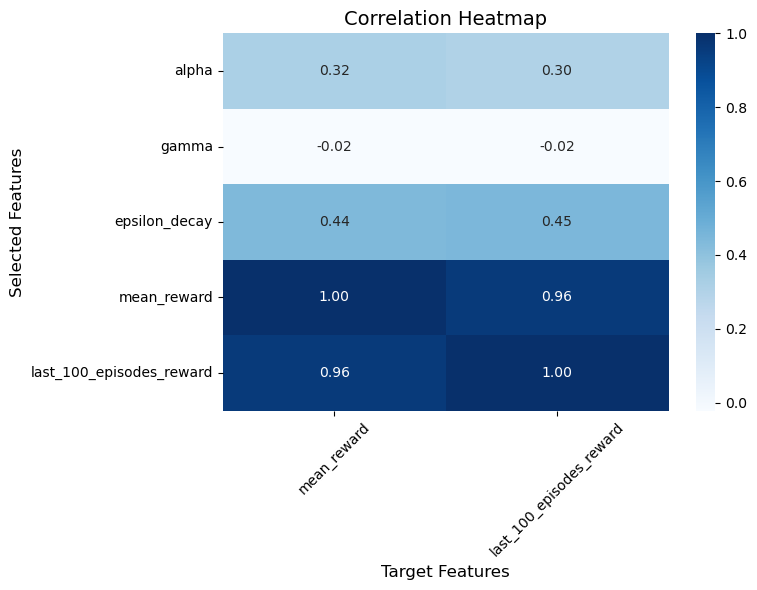

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt

# Select the relevant features
selected_features = ['alpha', 'gamma', 'epsilon_decay', 'mean_reward', 'last_100_episodes_reward']

# Calculate the correlation matrix
correlation_matrix = df[selected_features].corr()

# Extract the correlations of the selected features with the target features
correlation_with_targets = correlation_matrix[['mean_reward', 'last_100_episodes_reward']]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_with_targets, annot=True, cmap="Blues", fmt=".2f", cbar=True)

# Add title and labels
plt.title("Correlation Heatmap", fontsize=14)
plt.xlabel("Target Features", fontsize=12)
plt.ylabel("Selected Features", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Show the heatmap
plt.tight_layout()
plt.savefig("output/section_1/correaltion_metrics.png")
plt.show()


# Section 2

In [28]:
df_3_layer=pd.read_csv('output/section_2/RL-proj1-section2-3layer.csv')
df_5_layer=pd.read_csv('output/section_2/RL-proj1-section2-5layer.csv')

In [33]:
df_3_layer=df_3_layer[['params/learning_rate','params/discount factor','params/tau','train/last_100_avg_duration (average)','train/last_100_avg_duration (last)']]
df_3_layer.sort_values(by='train/last_100_avg_duration (last)',ascending=False).head()

,params/learning_rate,params/discount factor,params/tau,train/last_100_avg_duration (average),train/last_100_avg_duration (last)
10,0.001,0.99,0.10,245.816601,448.05
20,0.010,0.99,0.01,275.603359,335.74
22,0.010,0.97,0.10,232.908767,316.98
11,0.001,0.99,0.01,338.338421,279.17
13,0.001,0.97,0.10,200.852587,278.98


In [34]:
df_5_layer=df_5_layer[['params/learning_rate','params/discount factor','params/tau','train/last_100_avg_duration (average)','train/last_100_avg_duration (last)']]

df_5_layer.sort_values(by='train/last_100_avg_duration (last)',ascending=False).head()

,params/learning_rate,params/discount factor,params/tau,train/last_100_avg_duration (average),train/last_100_avg_duration (last)
2,0.0001,0.99,0.01,288.222899,488.42
1,0.0001,0.99,0.10,262.557774,465.17
11,0.0010,0.99,0.01,238.380080,346.66
13,0.0010,0.97,0.10,236.196364,339.61
15,0.0010,0.95,0.50,141.911612,307.33


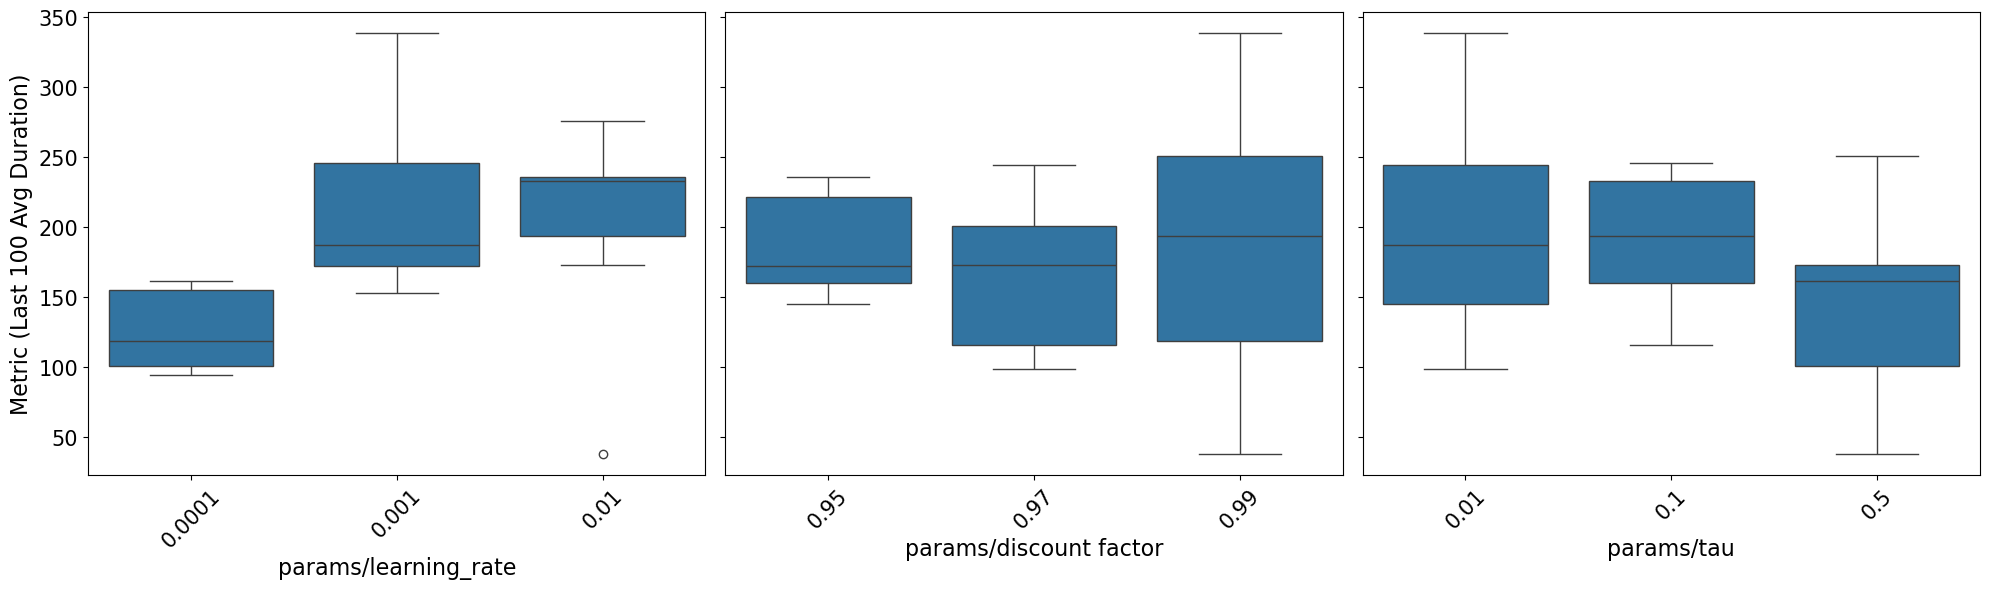

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define relevant hyperparameter columns and the metric
hyperparams = ['params/learning_rate', 'params/discount factor', 'params/tau']
metric = 'train/last_100_avg_duration (average)'
fig, axes = plt.subplots(1, len(hyperparams), figsize=(20, 6), sharey=True)

for ax, hyperparam in zip(axes, hyperparams):
    sns.boxplot(data=df_3_layer, x=hyperparam, y=metric, ax=ax)
    ax.set_xlabel(hyperparam,size=16)
    ax.set_ylabel('Metric (Last 100 Avg Duration)' if ax == axes[0] else '',size=16)
    ax.tick_params(axis='x', rotation=45,labelsize=15)
    ax.tick_params(axis='y',labelsize=15)

plt.tight_layout()
plt.savefig("output/section_2/boxplot_hp_3_layer.png")
plt.show()


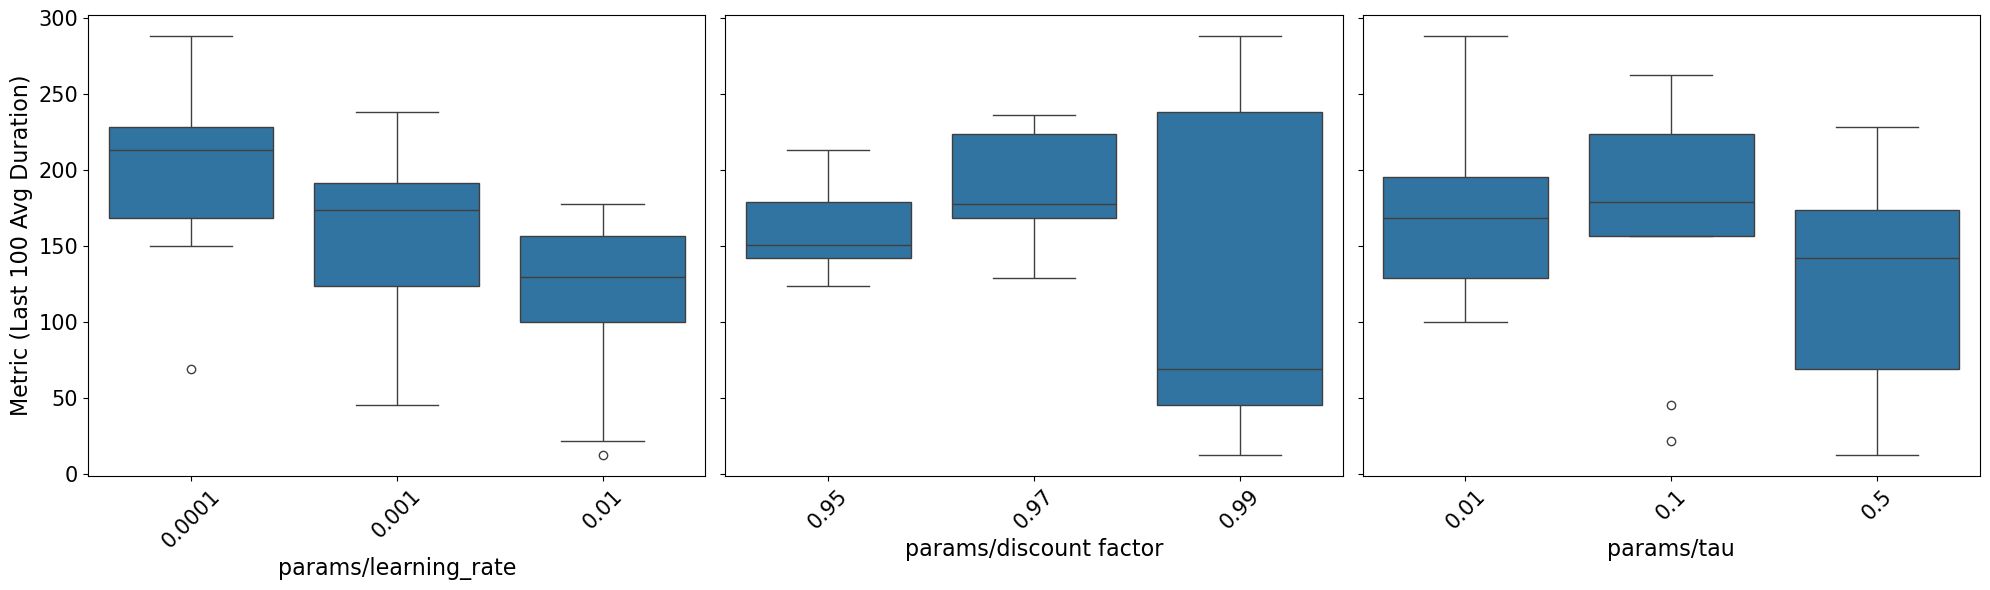

In [36]:


# Define relevant hyperparameter columns and the metric
hyperparams = ['params/learning_rate', 'params/discount factor', 'params/tau']
metric = 'train/last_100_avg_duration (average)'
fig, axes = plt.subplots(1, len(hyperparams), figsize=(20, 6), sharey=True)

for ax, hyperparam in zip(axes, hyperparams):
    sns.boxplot(data=df_5_layer, x=hyperparam, y=metric, ax=ax)
    ax.set_xlabel(hyperparam,size=16)
    ax.set_ylabel('Metric (Last 100 Avg Duration)' if ax == axes[0] else '',size=16)
    ax.tick_params(axis='x', rotation=45,labelsize=15)
    ax.tick_params(axis='y',labelsize=15)

plt.tight_layout()
plt.savefig("output/section_2/boxplot_hp_5_layer.png")
plt.show()


In [3]:
loss_df

,0.0,1734203933528,1.1190826892852783
0,1.0,1734203933534,1.046130
1,2.0,1734203933538,0.953679
2,3.0,1734203933542,0.939673
3,4.0,1734203933547,0.907118
4,5.0,1734203933552,0.846956
...,...,...,...
165445,165446.0,1734204755969,19.158312
165446,165447.0,1734204755975,28.815565
165447,165448.0,1734204755979,20.255219
165448,165449.0,1734204755983,17.532242


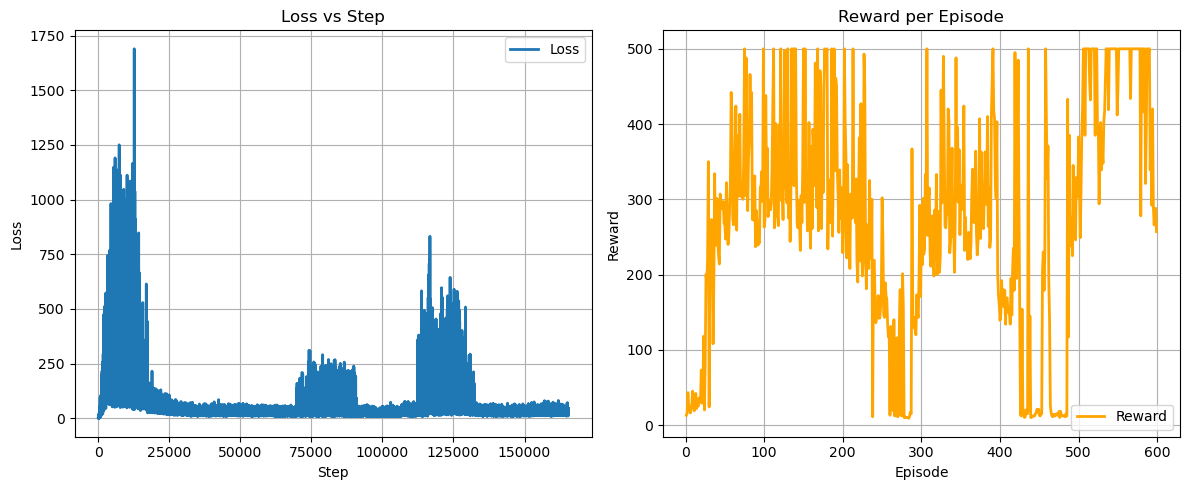

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded files
loss_df = pd.read_csv("output/section_2/3_layer_dqn/train_loss.csv")

reward_df = pd.read_csv("output/section_2/3_layer_dqn/train_duration.csv")

loss_df.columns = ["step", "timestamp", "loss"]
reward_df.columns = ["episode", "timestamp", "reward"]



# Define the function to plot loss vs step and reward per episode
def plot_loss_and_reward(loss_df, reward_df):
    """
    Plots loss vs step and reward per episode from two dataframes.

    Args:
        loss_df (pd.DataFrame): DataFrame containing 'step' and 'loss' columns.
        reward_df (pd.DataFrame): DataFrame containing 'episode' and 'reward' columns.
    """
    # Plot Loss vs Step
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_df['step'], loss_df['loss'], label='Loss', linewidth=2)
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title("Loss vs Step")
    plt.grid()
    plt.legend()

    # Plot Reward per Episode
    plt.subplot(1, 2, 2)
    plt.plot(reward_df['episode'], reward_df['reward'], label='Reward', color='orange', linewidth=2)
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.title("Reward per Episode")
    plt.grid()
    plt.legend()

    # Show both plots
    plt.tight_layout()
    plt.savefig("output/section_2/3_layer_dqn/model_evaluation.png")
    plt.show()

# Run the function to display the plots
plot_loss_and_reward(loss_df, reward_df)


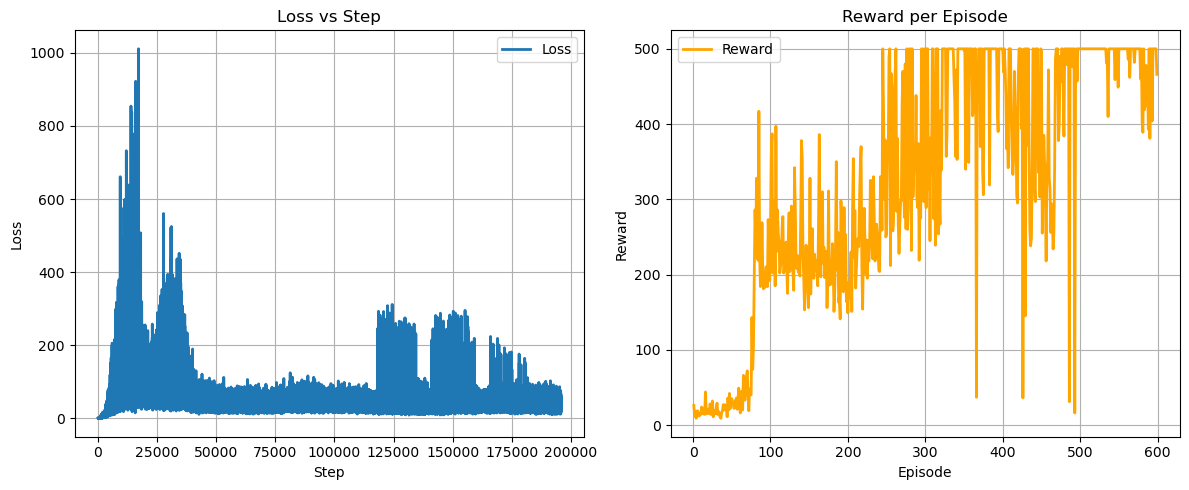

In [8]:
# Load the uploaded files
loss_df = pd.read_csv("output/section_2/5_layer_dqn/train_loss.csv")

reward_df = pd.read_csv("output/section_2/5_layer_dqn/train_duration.csv")

loss_df.columns = ["step", "timestamp", "loss"]
reward_df.columns = ["episode", "timestamp", "reward"]
plot_loss_and_reward(loss_df, reward_df)
